# Hotel Review Classificaton

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer # to lemmatize the words

In [3]:
data =pd.read_csv("Hotel_Reviews.csv", encoding = "ISO-8859-1")
data.head()

,Review,Feedback
0,nice hotel expensive parking got good deal sta...,Pos
1,ok nothing special charge diamond member hilto...,Neg
2,nice rooms not 4* experience hotel monaco seat...,Pos
3,"unique, great stay, wonderful time hotel monac...",Pos
4,"great stay great stay, went seahawk game aweso...",Pos


In [4]:
data.isnull().sum()

Review      0
Feedback    0
dtype: int64

In [5]:
# Duplicate Values
data.duplicated().value_counts()

False    20491
Name: count, dtype: int64

In [6]:
len(data)

20491

In [7]:
data.Review[1]

'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike kimpton calls suite, 5 day stay offer correct false advertising, send kimpton preferred guest website email asking failure provide suite advertised website reservation description furnished hard copy reservation printout website desk manager duty did not reply solution, send email trip guest survey did not follow email mail, guess tell concerned guest.the staff ranged indifferent not helpful, asked desk good breakfast spots neighborhood hood told no hotels, gee best breakfast spots seattle 1/2 block away convenient hotel does not know exist, arrived late night 11 pm inside run bellman bu

In [8]:
data.Feedback.value_counts() #the given data is imbalance data

Feedback
Pos    17277
Neg     3214
Name: count, dtype: int64

<AxesSubplot: xlabel='Feedback', ylabel='count'>

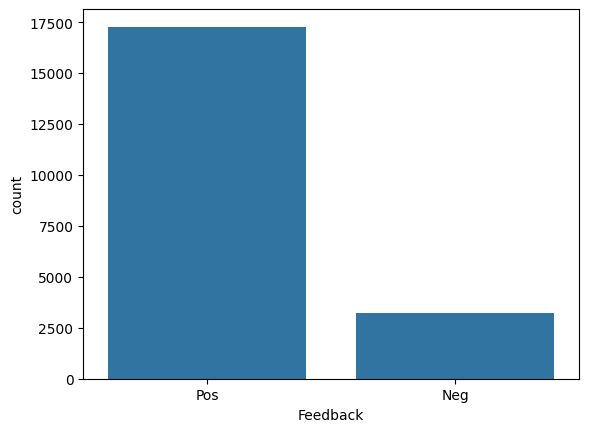

In [9]:
sns.countplot(x="Feedback", data=data)

In [10]:
X=data.iloc[1:,:1]
X

,Review
1,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso..."
5,love monaco staff husband stayed hotel crazy w...
...,...
20486,"best kept secret 3rd time staying charm, not 5..."
20487,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ..."
20489,hotel theft ruined vacation hotel opened sept ...


In [11]:
y=data["Feedback"]
y

0        Pos
1        Neg
2        Pos
3        Pos
4        Pos
        ... 
20486    Pos
20487    Pos
20488    Neg
20489    Neg
20490    Neg
Name: Feedback, Length: 20491, dtype: object

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shiri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shiri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shiri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
data['cleaned_review'] = data['Review'].apply(preprocess_text)

In [14]:
data

,Review,Feedback,cleaned_review
0,nice hotel expensive parking got good deal sta...,Pos,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,Neg,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,Pos,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",Pos,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",Pos,great stay great stay went seahawk game awesom...
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",Pos,best kept secret rd time staying charm star ca...
20487,great location price view hotel great quick pl...,Pos,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",Neg,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,Neg,hotel theft ruined vacation hotel opened sept ...


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

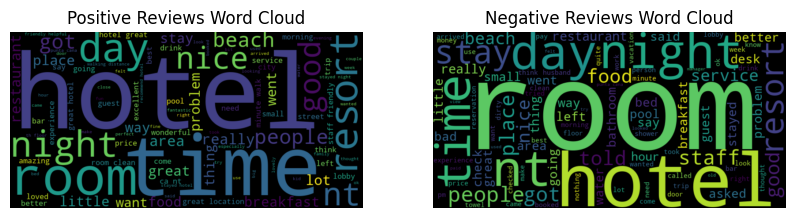

In [16]:
# Word Cloud for Positive and Negative Reviews
positive_reviews = data[data['Feedback'] == 'Pos']['cleaned_review']
negative_reviews = data[data['Feedback'] == 'Neg']['cleaned_review']

wordcloud_pos = WordCloud(width=800, height=400, max_words=100).generate(' '.join(positive_reviews))
wordcloud_neg = WordCloud(width=800, height=400, max_words=100).generate(' '.join(negative_reviews))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()




In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.7)
#Remove Extremely Rare or Frequent Terms: Use min_df and max_df
 #   parameters to exclude terms that occur too infrequently or too frequently.
X = vectorizer.fit_transform(data['cleaned_review']).toarray()
y = data['Feedback'].map({'Pos': 1, 'Neg': 0})

print(X.shape)


(20491, 5000)


In [18]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20486    1
20487    1
20488    0
20489    0
20490    0
Name: Feedback, Length: 20491, dtype: int64

In [20]:
X1 = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())

In [21]:
X1

,___,aaa,abc,ability,abit,able,abroad,absolute,absolutely,absolutley,...,younger,youre,yr,yuck,yum,yummy,yunque,zero,zone,zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.142039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042742,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

In [23]:
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


## Resampling


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X1, y)

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [47]:
print("Test data",X_test.shape)
print("Distribution of feedback :", y_test.value_counts())

Test data (10367, 5000)
Distribution of feedback : Feedback
1    5226
0    5141
Name: count, dtype: int64


In [27]:
print("X_trainShape: ",X_train.shape)
print("Distribution of feedback :", y_train.value_counts())

X_trainShape:  (24187, 5000)
Distribution of feedback : Feedback
0    12136
1    12051
Name: count, dtype: int64


<AxesSubplot: xlabel='Feedback', ylabel='count'>

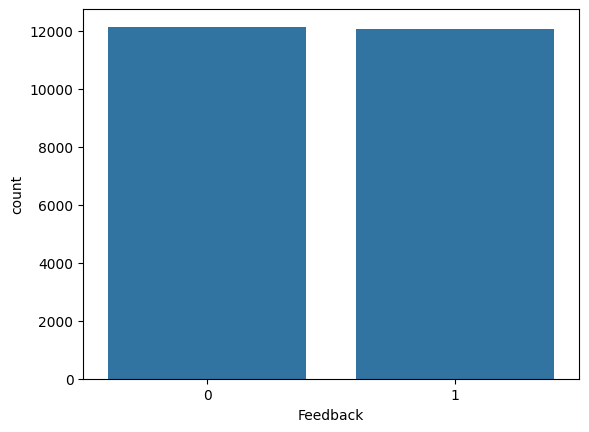

In [28]:
sns.countplot(x=y_train)

# Dimension Reduction 

In [29]:
from sklearn.decomposition import TruncatedSVD

# Reduce the number of features to 500 (you can adjust this number)
svd = TruncatedSVD(n_components=500)
X_train2 = svd.fit_transform(X_train)
X_test2 = svd.transform(X_test)



In [30]:
X_train2.shape

(24187, 500)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Dictionary of models
model_names = []
accuracy_scores = []
models = {
    "logistic regression": LogisticRegression(),
    "random forest": RandomForestClassifier(),
    "XGboostclassifier": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()


}
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train2, y_train)
    y_pred = model.predict(X_test2)

    accuracy = accuracy_score(y_test, y_pred)


    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
     # Store results
    model_names.append(name)
    accuracy_scores.append(accuracy)

Model: logistic regression
Accuracy: 0.9344
Model: random forest
Accuracy: 0.9393
Model: XGboostclassifier
Accuracy: 0.9504


C:\Users\Shiri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model: AdaBoost
Accuracy: 0.8898
Model: Naive Bayes
Accuracy: 0.7249
Model: k-NN
Accuracy: 0.8575
Model: Decision Tree
Accuracy: 0.8837


C:\Users\Shiri\AppData\Local\Temp\ipykernel_8608\507692487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_scores, y=model_names, palette='viridis')


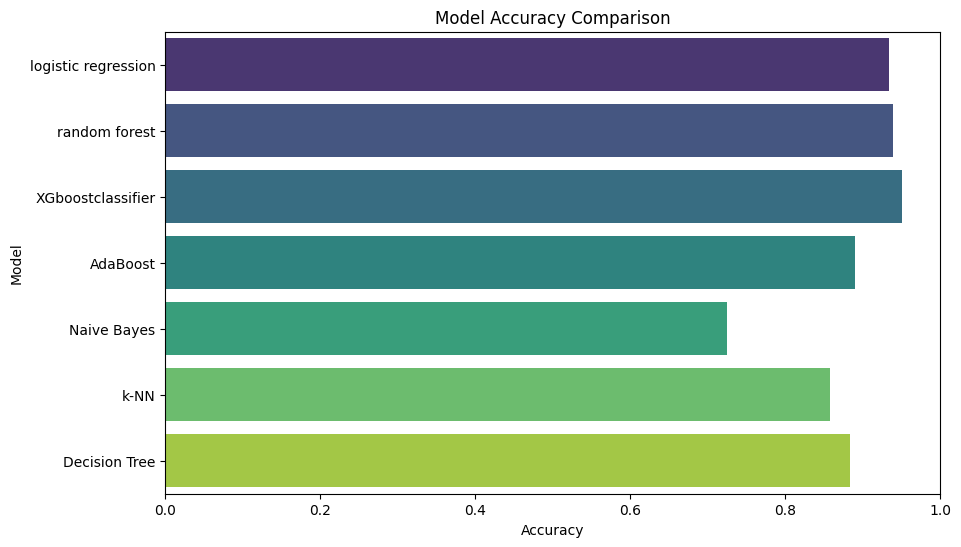

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=model_names, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

In [34]:
modelFinal= XGBClassifier()
modelFinal.fit(X_train2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
# Make predictions on the test set
y_pred = modelFinal.predict(X_test2)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.04%


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5141
           1       0.98      0.92      0.95      5226

    accuracy                           0.95     10367
   macro avg       0.95      0.95      0.95     10367
weighted avg       0.95      0.95      0.95     10367



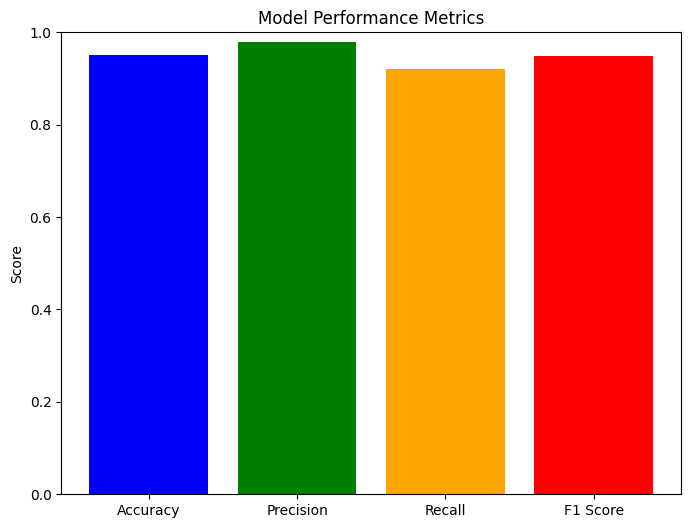

In [38]:

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Bar plot of metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()


<Figure size 1000x600 with 0 Axes>

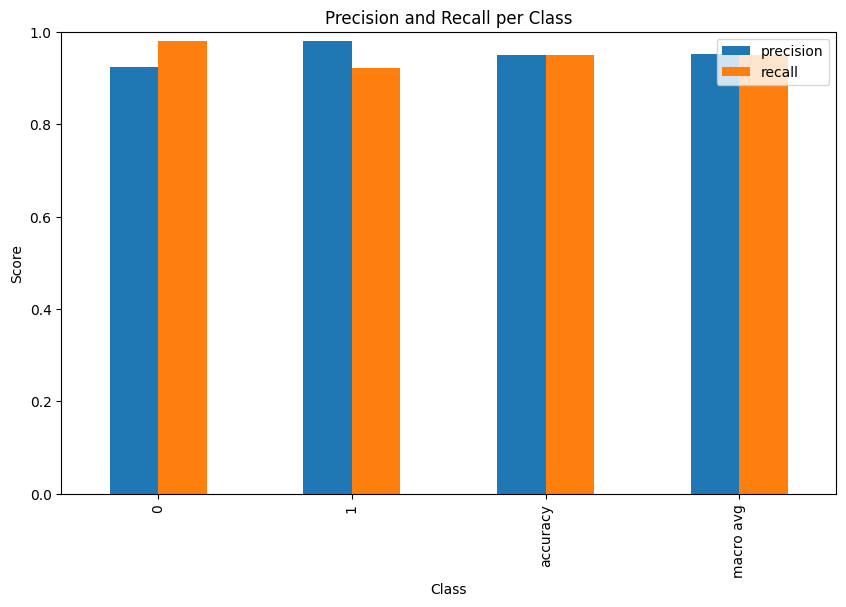

In [39]:
from sklearn.metrics import classification_report


# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Bar plot for precision and recall per class
plt.figure(figsize=(10, 6))
report_df[['precision', 'recall']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.ylim(0, 1)
plt.title('Precision and Recall per Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.show()


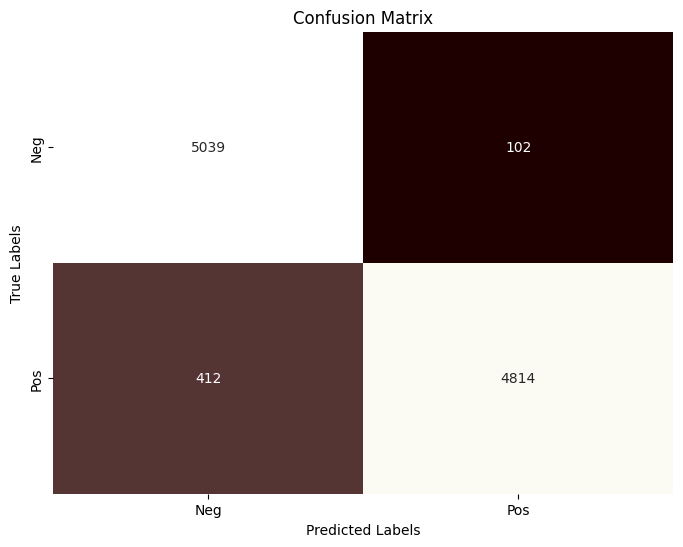

In [40]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='pink', cbar=False)

# Labels, title, and ticks
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg', 'Pos'])
ax.yaxis.set_ticklabels(['Neg', 'Pos'])

plt.show()

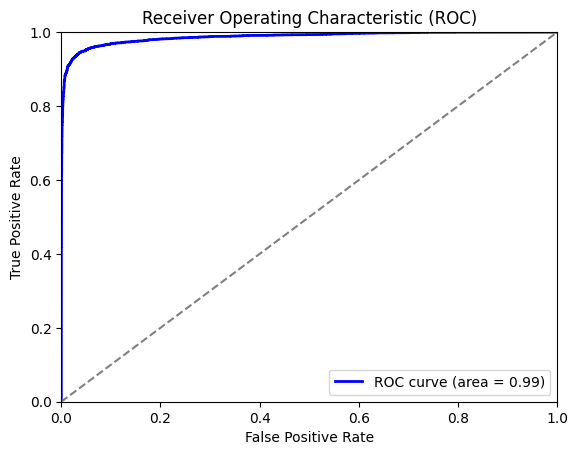

In [41]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Get predicted probabilities
y_prob = modelFinal.predict_proba(X_test2)[:, 1]  # Probability estimates for the positive class
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



# Testing on new data

In [42]:
import pickle


# Example new reviews
new_reviews = [
    "This Hotel is amazing! I absolutely love it.",
    "I am very disappointed with the quality of this item.",
    "The service was excellent and the staff were very friendly.",
    "This was the dirty  I've ever made.",
    "Worst Bad, i won't prefer zzzzzzzzzzzzzzzzzzzzz",
    "It's okay, not the best but not the worst either."
]





In [43]:
# Assuming X_train is your original training data and y_train are the labels

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# import pickle

# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(vectorizer, f)
# with open('DimensionSVD.pkl', 'wb') as d:
#     pickle.dump(svd, d)
# Transform the new reviews using the fitted vectorizer
X_new = vectorizer.transform(new_reviews)

X_new = svd.transform(X_new)

# Make predictions on the new reviews
y_new_pred = modelFinal.predict(X_new)

# Map predictions to labels (assuming binary classification)
labels = {0: 'Negative', 1: 'Positive'}
predicted_labels = [labels[pred] for pred in y_new_pred]

# Print out the reviews with their predicted labels
for review, label in zip(new_reviews, predicted_labels):
    print(f"Review: {review}\nPrediction: {label}\n")


Review: This Hotel is amazing! I absolutely love it.
Prediction: Positive

Review: I am very disappointed with the quality of this item.
Prediction: Negative

Review: The service was excellent and the staff were very friendly.
Prediction: Positive

Review: This was the dirty  I've ever made.
Prediction: Negative

Review: Worst Bad, i won't prefer zzzzzzzzzzzzzzzzzzzzz
Prediction: Negative

Review: It's okay, not the best but not the worst either.
Prediction: Negative



C:\Users\Shiri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but TruncatedSVD was fitted with feature names
  warnings.warn(


In [45]:
import pickle

with open('modelFinal.pkl', 'wb') as model_file:
    pickle.dump(modelFinal, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

with open('svd.pkl', 'wb') as svd_file:
    pickle.dump(svd, svd_file)
